In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium

#### Reading in the merged CSV

In [2]:
df=pd.read_csv('merged.csv')

In [3]:
df.head(2)

,Unnamed: 0,inspection_date,inspector,number_of_violations,violations,zip_code,house_numbers,categories,transactions,distance,...,establishment_x,establishment_y,address_x,address_y,trimmed_name_x,trimmed_name_y,clean_address_x,clean_address_y,address_distance,name_distance
0,0,2019-01-02,Cicily Martinez,3,"['22', '29', '45']",78212,2524,"['Italian', 'Desserts', 'Seafood']",[],4950.353662,...,capparellis on main,Capparelli's On Main,2524 main av n,2524 n main ave,capparellis main,capparellis main,main,n maine,3,0
1,1,2019-03-06,RYAN DAVIS,1,['31'],78230,14439,"['French', 'Asian Fusion', 'Tapas/Small Plates']",[],9312.955170,...,fredrick's bistro,Frederick's Bistro,14439 military hy nw,14439 nw military hwy,fredrick's bistro,fredericks bistro,military hwy,nw military hwy,3,2


#### Dropping unneeded columns to make a smaller dataframe

In [6]:
df.drop(columns=['Unnamed: 0', 'address_x', 'establishment_x', 'trimmed_name_x', 'clean_address_x', 'clean_address_y',
       'address_distance', 'name_distance','house_numbers', 'transactions', 'trimmed_name_y', 'distance'], inplace =True)

In [9]:
df.head(1)

,inspection_date,inspector,number_of_violations,violations,zip_code,categories,review_count,longitude,latitude,name,sector,district,total_score,rating,price,establishment_y,address_y
0,2019-01-02,Cicily Martinez,3,"['22', '29', '45']",78212,"['Italian', 'Desserts', 'Seafood']",99.0,-98.49378,29.45373,Capparelli's On Main,35,D,97,3.5,$$,Capparelli's On Main,2524 n main ave


#### Reordering the columns names for easier readability

In [12]:
df = df[['inspection_date','establishment_y', 'address_y', 'zip_code', 'categories', 'price', 'rating', 'review_count', 'sector', 'district', 'inspector', 'number_of_violations', 'violations', 'total_score']]

In [13]:
df.head()

,inspection_date,establishment_y,address_y,zip_code,categories,price,rating,review_count,sector,district,inspector,number_of_violations,violations,total_score
0,2019-01-02,Capparelli's On Main,2524 n main ave,78212,"['Italian', 'Desserts', 'Seafood']",$$,3.5,99.0,35,D,Cicily Martinez,3,"['22', '29', '45']",97
1,2019-03-06,Frederick's Bistro,14439 nw military hwy,78230,"['French', 'Asian Fusion', 'Tapas/Small Plates']",$$$,4.0,102.0,9,A,RYAN DAVIS,1,['31'],98
2,2019-07-10,Tokyo Mart,825 w hildebrand ave,78212,['International Grocery'],$,4.5,20.0,18,B,Jacob Johanson,1,['19'],97
3,2019-11-04,Fina's Kitchen,914 w hildebrand ave,78201,['Mexican'],$,4.0,42.0,35,D,Cicily Martinez,3,"['10', '15', '40']",93
4,2019-03-14,Bill Miller Bar-B-Q,13151 nw military hwy,78230,['Barbeque'],$,2.5,41.0,9,A,RYAN DAVIS,0,[],100


## Graphs!

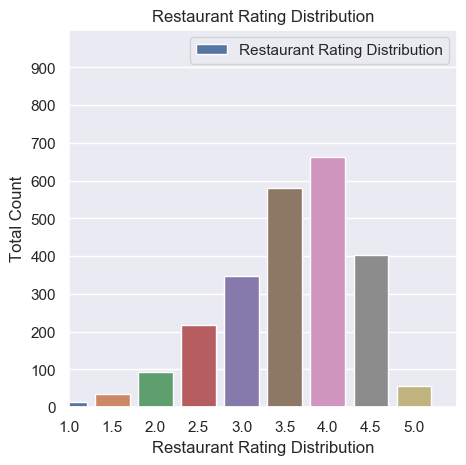

In [23]:
plt.figure(figsize = (5,5), dpi = 100, facecolor = "w")
sns.set(style="darkgrid")
ax = sns.countplot(x=df.rating, data=df, label = 'Restaurant Rating Distribution')
plt.xlim(0,9)
plt.ylim(0,1000)
plt.ylabel("Total Count")
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("Restaurant Rating Distribution")
plt.xlabel('Restaurant Rating Distribution')
plt.show()

In [42]:
# plt.figure(figsize = (5,5), dpi = 100, facecolor = "w")
# sns.set(style="darkgrid")
# ax = sns.lineplot(x=df.review_count, data=df, label = 'Restaurant Reviews Distribution')
# plt.xlim(0,100)
# plt.ylim(0,1000)
# plt.ylabel("Total Count")
# plt.legend()
# plt.yticks(np.arange(0, 1000, step=100))
# plt.title("Restaurant Reviews Distribution")
# plt.xlabel('Restaurant Reviews Distribution')
# plt.show()

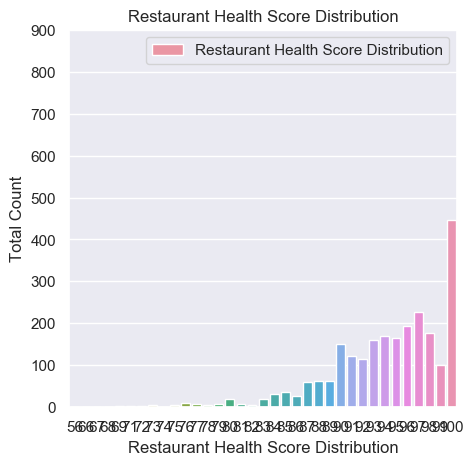

In [41]:
plt.figure(figsize = (5,5), dpi = 100, facecolor = "w")
sns.set(style="darkgrid")
ax = sns.countplot(x=df.total_score, data=df, label = 'Restaurant Health Score Distribution')
# plt.xlim(25,101)
plt.ylim(0,500)
plt.ylabel("Total Count")
plt.legend()
# plt.xticks(np.arange(25, 100, step = 5))
plt.yticks(np.arange(0, 1000, step=100))
plt.title("Restaurant Health Score Distribution")
plt.xlabel('Restaurant Health Score Distribution')
plt.show()

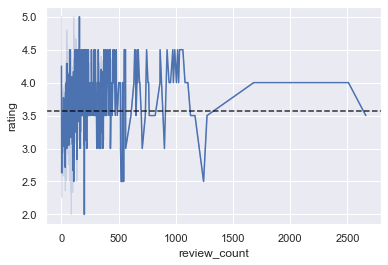

In [45]:
avg_rating = df['rating'].mean()

sns.lineplot(x="review_count", y="rating", data=df)
plt.axhline(avg_rating, ls='--', label= 'Ratings vs Review', alpha = 0.8, color='black')
plt.show()

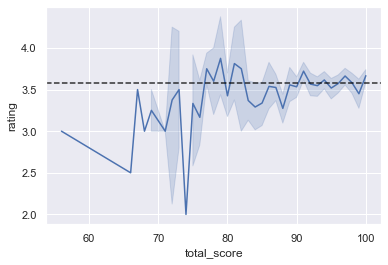

In [47]:
avg_rating = df['rating'].mean()

sns.lineplot(x="total_score", y="rating", data=df)
plt.axhline(avg_rating, ls='--', label= 'Ratings vs Review', alpha = 0.8, color='black')
plt.show()

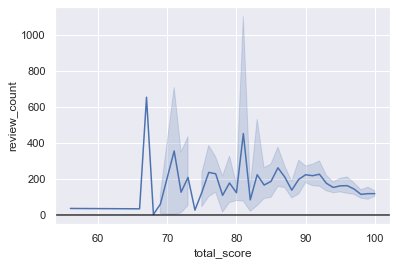

In [50]:
# avg_rating = df['rating'].mean()

sns.lineplot(x="total_score", y="review_count", data=df)
plt.axhline(label= 'Ratings vs Review', alpha = 0.8, color='black')
plt.show()

In [55]:
df.inspector.value_counts()

Lauren Schumacher     194
Jacob Johanson        159
RYAN DAVIS            153
Jeffrey Carrizales    148
Sumner Bumgardner     127
Diana Garcia          117
Cicily Martinez       116
Bamba Njie            109
Bernard Capdeboscq    105
Valerie Suarez        104
Benito Zuniga          97
Deborah Liu            96
Nathan Balfour         90
Raul Jimenez           87
Daisy Zamora           82
Debra Hernandez        59
MICHELLE MORENO        55
Mario Cavazos          54
Kassandra Aguilar      53
Amanda Cantu           52
John Payelle           48
William Hudson         43
Erica Arreola          42
William Emminger       37
Kathleen Prenzler      34
Adan Zamora            24
Monica Caballero       22
Kacie Patrick          20
Sean Gilbert           20
Fermin Garza           18
Joe Mokry              15
Juanicia Page          10
Victoria Paredes        9
Daniel Guzman           4
Maurico Ripley          3
Erica Llanas            2
Rebecca Vera            1
Name: inspector, dtype: int64